In [86]:
# import the necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf 
from tensorflow import keras
from keras import layers

import random

# Set random seeds for reproducibility
seed = 22
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

import warnings
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [88]:
df.shape

# 398 rows 9 columns

(398, 9)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [90]:
# Check the data types
df.dtypes.value_counts()

int64      4
float64    3
object     2
Name: count, dtype: int64

In [91]:
df.duplicated().sum()

0

In [92]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['horsepower', 'car name']
Numerical columns : ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']


In [93]:
# Deal with categorical features
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [94]:
df['horsepower'].unique() # notice the ?

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [95]:
# Drop rows with ?
print(df.shape)
df = df[df['horsepower'] != '?']
print(df.shape)

(398, 9)
(392, 9)


In [96]:
df.dtypes

# horsepower is still object

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [97]:
df['horsepower'] = df['horsepower'].astype(int)

In [98]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN


In [99]:
# create df for numerical col only
num_df = df.select_dtypes(include=['number'])
num_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


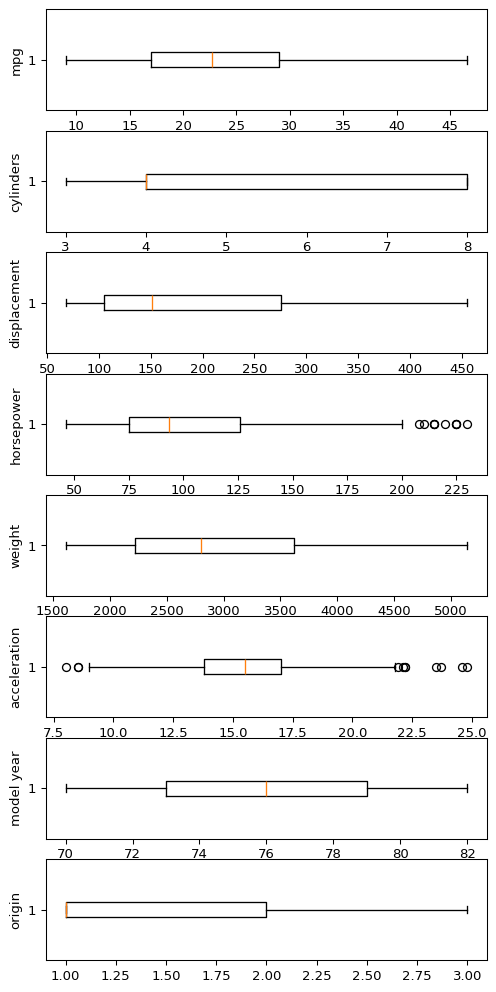

In [100]:
# Check for outliers

# Create a subplot with num_df rows and 1 column
fig, axs = plt.subplots(len(num_df.columns), 1, dpi=95, figsize=(6,13))

# Loop through the columns and create box plots
i = 0
for col in num_df:
    axs[i].boxplot(df[col], vert=False)  # Create horizontal box plot
    axs[i].set_ylabel(col)               # Label each plot with column name
    i += 1

plt.show()


In [101]:
# Drop Outliers

# Identify the 1st (Q1) and 3rd (Q3) quartiles
q1, q3 = np.percentile(df['horsepower'], [25, 75])
# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
# Calculate the lower and upper bounds for detecting outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers from the DataFrame
clean_data = df[(df['horsepower'] >= lower_bound) & (df['horsepower'] <= upper_bound)]
# Print the number of outliers removed
print(f"Original dataset size: {len(df)}")
print(f"Clean dataset size: {len(clean_data)}")

# Identify the 1st (Q1) and 3rd (Q3) quartiles
q1, q3 = np.percentile(df['acceleration'], [25, 75])
# Calculate the Interquartile Range (IQR)
iqr = q3 - q1
# Calculate the lower and upper bounds for detecting outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers from the DataFrame
clean_data = clean_data[(clean_data['acceleration'] >= lower_bound) & (clean_data['acceleration'] <= upper_bound)]
# Print the number of outliers removed
print(f"Clean dataset size: {len(clean_data)}")

clean_data.shape

Original dataset size: 392
Clean dataset size: 382
Clean dataset size: 372


(372, 9)

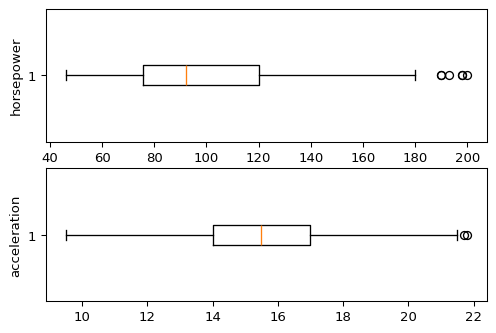

In [102]:
# check outliers for acceleration and horsepower
fig, axs = plt.subplots(2, 1, dpi=95, figsize=(6,4))

axs[0].boxplot(clean_data["horsepower"], vert=False)  # Create horizontal box plot
axs[0].set_ylabel("horsepower")               # Label each plot with column name

axs[1].boxplot(clean_data["acceleration"], vert=False)  # Create horizontal box plot
axs[1].set_ylabel("acceleration")               # Label each plot with column name


plt.show()

In [103]:
# create num df from clean data for correlation
num_df_clean = clean_data.select_dtypes(include=['number'])
num_df_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


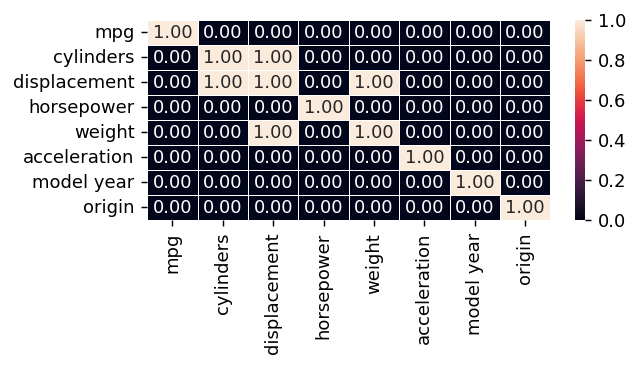

In [104]:
# Correlation
corr = num_df_clean.corr() 
 
plt.figure(dpi=130, figsize=(5,2))
sns.heatmap(corr>0.9, annot=True, fmt='.2f', cbar=True, linewidths=0.5)
plt.show()

# 0-False 1-True

In [105]:
# drop displacement as it is highly correlated
clean_data.drop('displacement',axis=1,inplace=True)

In [106]:
from sklearn.model_selection import train_test_split
features = clean_data.drop(['mpg', 'car name'], axis=1)   #drop carname
target = clean_data['mpg'].values

X_train, X_test, Y_train, Y_test = train_test_split(features, target,
									test_size=0.2,
									random_state=22)
X_train.shape, X_test.shape

((297, 6), (75, 6))

In [107]:
# Data Input Pipeline

AUTO = tf.data.experimental.AUTOTUNE	# automatically tune the process

train_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_train, Y_train)) # create a training dataset
	.batch(32) # batch size no 32
	.prefetch(AUTO) # automatically tune prefetching
)

test_ds = (
	tf.data.Dataset
	.from_tensor_slices((X_test, Y_test))
	.batch(32)
	.prefetch(AUTO)
)

# Batch size is no of data points passed through the model
# Model performs 32 samples at a time, then updates after each sample
# Eg data of 10k samples, then for one epoch model performs 10k/32=312 updatess

In [108]:
# Model Architecture
# Define a neural network using TensorFlow's Keras Sequential API

# Initialize the Sequential model
model = keras.Sequential([

    # First Dense layer with 256 neurons, ReLU activation, and input shape of 6 features
    layers.Dense(256, activation='relu', input_shape=[6]),  
    
    # Apply Batch Normalization, normalize inputs in each layer to stabilize training
    layers.BatchNormalization(),
    
    # Second Dense layer with 256 neurons and ReLU activation
    layers.Dense(256, activation='relu'),
    
    # Dropout layer, 30% of neurons are dropped set to 0 to prevent overfitting
    # Improve generalization on unseen data.
    layers.Dropout(0.3),
    
    # Apply another Batch Normalization after the second Dense layer
    layers.BatchNormalization(),
    
    # Output Dense layer with 1 neuron and ReLU activation
    # ReLU here ensures the output is non-negative
    layers.Dense(1, activation='relu')  
])


In [109]:
model.compile(
	loss='mae',			# Mean Absolute Error is loss function used for training
	optimizer='adam',	# Adam optimizer for efficient gradient descent
	metrics=['mape']	# Mean Absolute Percentage Error as a metric to evaluate model accuracy
)

In [110]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,889 (273.00 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 1,024 (4.00 KB)

+ sequential_4  
The 4th version of a sequential model used in this session  
+ dense layer fully connected layer  
Output, outputs layer with 256 neurons  
None means batch size is flexible, depends on input data  
`param=(input x units)+biases` (6×256)+256=1,792  
+ batch normalization  
(256x2)=512 for scaling+512 for shifting=1,024  
+ dense layer 2  
`param=(input x units)+biases` (256×256)+256=65,792  
+ dropout layer  
No parameters are learned in the dropout layer  
+ dense layer  
Only 1 output  
`param=(input x units)+biases` (256×1)+1=257  


In [111]:
# Model Training
history = model.fit(train_ds,
					epochs=50,              # how many times the model will go through the entire dataset
					validation_data=test_ds) # dataset to evaluate performance after each epoch

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 21.5519 - mape: 87.8831 - val_loss: 36.2328 - val_mape: 193.1203
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19.7331 - mape: 77.4265 - val_loss: 20.4596 - val_mape: 113.7791
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19.3161 - mape: 75.4890 - val_loss: 12.0968 - val_mape: 53.6605
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.6244 - mape: 71.4091 - val_loss: 11.7809 - val_mape: 46.6394
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.9600 - mape: 68.3074 - val_loss: 12.8474 - val_mape: 46.4174
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.4686 - mape: 65.8582 - val_loss: 13.5074 - val_mape: 48.9342
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.9860 - mape: 63.5047 - val_loss: 12.8815 - val_mape: 46.5293
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.2426 - mape: 60.1067 - val_loss: 11.3918 - val_mape: 40.6907
Epoch 9/50
10/10 ━

+ loss  
Training loss, the error the model makes on the training data after each epoch  
Helps model adjust its weights to minimize the difference btwn predicted and actual values  
+ val_loss  
How well model acts on unseen data  
+ mape  
Mean Absolute %age Error btwn actual and predicted values  
+ val_mape  

In [112]:
history_df = pd.DataFrame(history.history)
history_df.head()

# history.history is a dictionary where the keys are the names of the metrics (e.g., 'loss', 'val_loss')
# history.history['loss'] has training loss values for each epoch

,loss,mape,val_loss,val_mape
0,20.884377,83.443878,36.232811,193.120255
1,19.623287,76.345818,20.459591,113.779060
2,19.114197,73.733131,12.096821,53.660522
3,18.486702,70.273300,11.780949,46.639381
4,17.873505,67.300079,12.847448,46.417351


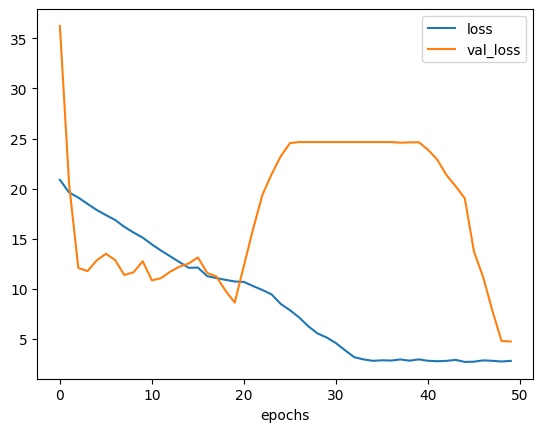

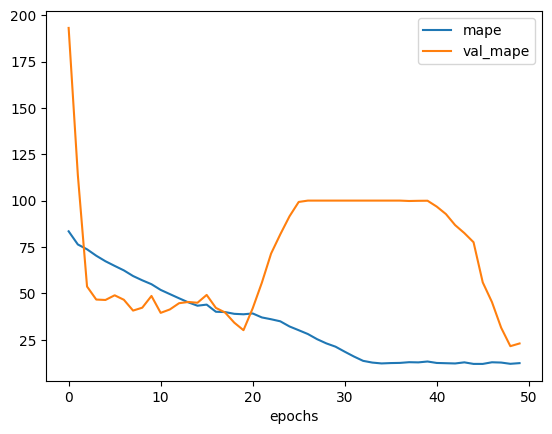

In [113]:
history_df.loc[:, ['loss', 'val_loss']].plot(xlabel='epochs') # all rows, loss and val_loss columns
history_df.loc[:, ['mape', 'val_mape']].plot(xlabel='epochs') # all rows, mape and val_mape columns
plt.show()